In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Thesis/Data/Docanno

/content/drive/My Drive/Thesis/Data/Docanno


In [4]:
pip install cupy-cuda12x

In [5]:
import pandas as pd
df = pd.read_json("AnnotatedNerData.json")

In [ ]:
print(df.loc[0])

text        1st family: a healthy queen observed workers a...
entities    [[12, 13, HEALTHSTATUS], [14, 21, HEALTHSTATUS...
Name: 0, dtype: object


# **Word Cloud**

In [6]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for review in df['text']:
    # typecaste each val to string
    review = str(review).lower()

    # split the value
    tokens = review.split()
    comment_words = comment_words + ' '.join(tokens)

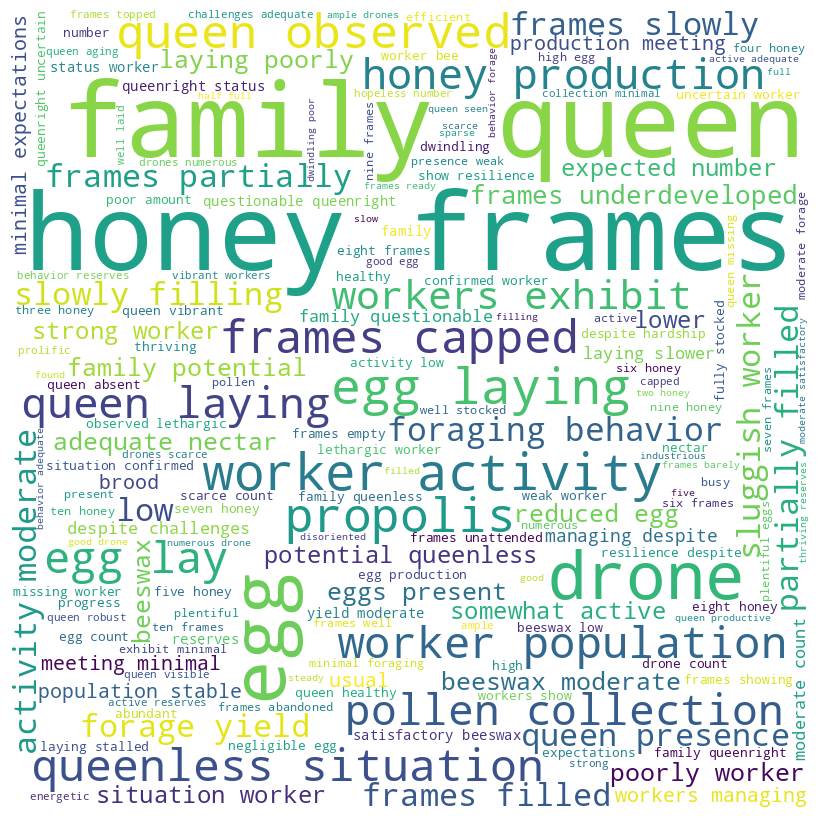

In [ ]:
#To represent the frequency or significance of different words in the dataset.
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def show_entity_distribution(df, entity_col='entities'):
    all_entities = [ent[2] for sublist in df[entity_col] for ent in sublist if len(sublist) > 0]

    entities_df = pd.DataFrame(all_entities, columns=['Entity Type'])
    entity_counts = entities_df['Entity Type'].value_counts().reset_index()
    entity_counts.columns = ['Entity Type', 'Count']


    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {}]])
    fig.add_trace(
        go.Pie(labels=entity_counts['Entity Type'], values=entity_counts['Count'], name="% Distribution", hole=.5),
        1, 1
    )
    fig.add_trace(
        go.Bar(x=entity_counts['Entity Type'], y=entity_counts['Count'], name="Frequency Distribution"),
        1, 2
    )
    fig.update_layout(title="Entity Type Distribution and Frequency Distribution")
    fig.show()

show_entity_distribution(df)


In [9]:
df_new = df.copy()

In [ ]:
df

,text,entities
0,1st family: a healthy queen observed workers a...,"[[12, 13, HEALTHSTATUS], [14, 21, HEALTHSTATUS..."
1,2nd family: queenright with an extensive brood...,"[[12, 22, QUEEN], [55, 62, WORKER], [76, 84, H..."
2,3rd family: Queen’s presence confirmed strong ...,"[[12, 19, QUEEN], [20, 51, HEALTHSTATUS], [66,..."
3,4th family: Queen is laying well the worker po...,"[[12, 17, QUEEN], [18, 32, HEALTHSTATUS], [37,..."
4,5th family: Queen is healthy drone population ...,"[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,..."
...,...,...
553,"700th family: queen presence weak, workers exh...","[[14, 19, QUEEN], [20, 33, HEALTHSTATUS], [35,..."
554,"701st family: queen observed lethargic, worker...","[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,..."
555,"702nd family: queenless situation confirmed, w...","[[14, 23, QUEEN], [34, 43, HEALTHSTATUS], [45,..."
556,"703rd family: queenright uncertain, worker act...","[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,..."


In [ ]:
df_new

,text,entities
0,1st family: a healthy queen observed workers a...,"[[12, 13, HEALTHSTATUS], [14, 21, HEALTHSTATUS..."
1,2nd family: queenright with an extensive brood...,"[[12, 22, QUEEN], [55, 62, WORKER], [76, 84, H..."
2,3rd family: Queen’s presence confirmed strong ...,"[[12, 19, QUEEN], [20, 51, HEALTHSTATUS], [66,..."
3,4th family: Queen is laying well the worker po...,"[[12, 17, QUEEN], [18, 32, HEALTHSTATUS], [37,..."
4,5th family: Queen is healthy drone population ...,"[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,..."
...,...,...
553,"700th family: queen presence weak, workers exh...","[[14, 19, QUEEN], [20, 33, HEALTHSTATUS], [35,..."
554,"701st family: queen observed lethargic, worker...","[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,..."
555,"702nd family: queenless situation confirmed, w...","[[14, 23, QUEEN], [34, 43, HEALTHSTATUS], [45,..."
556,"703rd family: queenright uncertain, worker act...","[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,..."


In [10]:
df_new['has_healthstatus'] = df_new['entities'].apply(lambda x: any('HEALTHSTATUS' in ent for ent in x))

In [ ]:
df_new

,text,entities,has_healthstatus
0,1st family: a healthy queen observed workers a...,"[[12, 13, HEALTHSTATUS], [14, 21, HEALTHSTATUS...",True
1,2nd family: queenright with an extensive brood...,"[[12, 22, QUEEN], [55, 62, WORKER], [76, 84, H...",True
2,3rd family: Queen’s presence confirmed strong ...,"[[12, 19, QUEEN], [20, 51, HEALTHSTATUS], [66,...",True
3,4th family: Queen is laying well the worker po...,"[[12, 17, QUEEN], [18, 32, HEALTHSTATUS], [37,...",True
4,5th family: Queen is healthy drone population ...,"[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,...",True
...,...,...,...
553,"700th family: queen presence weak, workers exh...","[[14, 19, QUEEN], [20, 33, HEALTHSTATUS], [35,...",True
554,"701st family: queen observed lethargic, worker...","[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,...",True
555,"702nd family: queenless situation confirmed, w...","[[14, 23, QUEEN], [34, 43, HEALTHSTATUS], [45,...",True
556,"703rd family: queenright uncertain, worker act...","[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,...",True


In [ ]:
df

,text,entities
0,1st family: a healthy queen observed workers a...,"[[12, 13, HEALTHSTATUS], [14, 21, HEALTHSTATUS..."
1,2nd family: queenright with an extensive brood...,"[[12, 22, QUEEN], [55, 62, WORKER], [76, 84, H..."
2,3rd family: Queen’s presence confirmed strong ...,"[[12, 19, QUEEN], [20, 51, HEALTHSTATUS], [66,..."
3,4th family: Queen is laying well the worker po...,"[[12, 17, QUEEN], [18, 32, HEALTHSTATUS], [37,..."
4,5th family: Queen is healthy drone population ...,"[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,..."
...,...,...
553,"700th family: queen presence weak, workers exh...","[[14, 19, QUEEN], [20, 33, HEALTHSTATUS], [35,..."
554,"701st family: queen observed lethargic, worker...","[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,..."
555,"702nd family: queenless situation confirmed, w...","[[14, 23, QUEEN], [34, 43, HEALTHSTATUS], [45,..."
556,"703rd family: queenright uncertain, worker act...","[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,..."


Since the data is imbalanced data, it should be balanced, I will apply cluster-based undersampling techniuewb: K-means.

In [11]:
import pandas as pd

df_new['healthstatus_count'] = df_new['entities'].apply(lambda ents: sum(1 for _, _, type in ents if type == 'HEALTHSTATUS'))
df_new['other_entities_count'] = df_new['entities'].apply(lambda ents: sum(1 for _, _, type in ents if type != 'HEALTHSTATUS'))
df_new['ratio'] = df_new['healthstatus_count'] / (df_new['other_entities_count'] + 1)  # Add 1 to avoid division by zero

# Filter or sample data based on ratio
# For example, you might decide to undersample sentences with a very high 'healthstatus_count' to 'other_entities_count' ratio
threshold_ratio = 3  # Example threshold, adjust based on analysis
high_ratio_data = df_new[df_new['ratio'] > threshold_ratio]  # Data to potentially undersample
balanced_data = df_new[df_new['ratio'] <= threshold_ratio]  # Already balanced data

# Optionally, sample from high_ratio_data
undersampled_high_ratio_data = high_ratio_data.sample(frac=0.5)  # Adjust sampling fraction based on needs

# Combine back to form a new balanced dataset
df_new_1 = pd.concat([balanced_data, undersampled_high_ratio_data])



Based on the DataFrame you've shared, it appears that you've successfully added columns to compute the count of "HEALTHSTATUS" entities, the count of other types of entities, and their ratio within each sentence. This structure allows you to make informed decisions on how to undersample your dataset.

Here's how you can proceed with a more targeted approach to undersampling based on the ratios you calculated, aiming to balance the representation of "HEALTHSTATUS" relative to other entity types in your dataset.
Entity Counting: We are counting occurrences of "HEALTHSTATUS" and other entities.
Ratio Calculation: A ratio of "HEALTHSTATUS" to other entities per sentence guides the undersampling.
Selective Undersampling: Based on the calculated ratio, selectively undersample those sentences where "HEALTHSTATUS" significantly outweighs other entities.

In [12]:
def undersample_majority_entities(entities, entity_type, max_occurrences=2):
    # Filter out the specific entity type
    #print(entities)
    majority_entities = [ent for ent in entities if ent[2] == entity_type]
    non_majority_entities = [ent for ent in entities if ent[2] != entity_type]

    #print(majority_entities)
    #print(majority_entities)
    # Check if majority entities exceed the maximum allowed occurrences
    if len(majority_entities) > max_occurrences:
        # Shuffle and then pick the allowed number of majority entities
        import random
        random.shuffle(majority_entities)
        majority_entities = majority_entities[:max_occurrences]

    # Combine the reduced majority list with the non-majority entities
    final_entities = non_majority_entities + majority_entities
    # Sort by the start position of entities to maintain the original order
    final_entities.sort(key=lambda x: x[0])
    return final_entities

# Example usage with DataFrame apply
df['undersampled'] = df['entities'].apply(undersample_majority_entities, args=('HEALTHSTATUS', 2))

# Display for checking results
df[['entities', 'undersampled']]

,entities,undersampled
0,"[[12, 13, HEALTHSTATUS], [14, 21, HEALTHSTATUS...","[[12, 13, HEALTHSTATUS], [22, 27, QUEEN], [37,..."
1,"[[12, 22, QUEEN], [55, 62, WORKER], [76, 84, H...","[[12, 22, QUEEN], [55, 62, WORKER], [76, 84, H..."
2,"[[12, 19, QUEEN], [20, 51, HEALTHSTATUS], [66,...","[[12, 19, QUEEN], [88, 96, BEEPRODUCT], [102, ..."
3,"[[12, 17, QUEEN], [18, 32, HEALTHSTATUS], [37,...","[[12, 17, QUEEN], [18, 32, HEALTHSTATUS], [37,..."
4,"[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,...","[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,..."
...,...,...
553,"[[14, 19, QUEEN], [20, 33, HEALTHSTATUS], [35,...","[[14, 19, QUEEN], [35, 42, WORKER], [59, 67, H..."
554,"[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,...","[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,..."
555,"[[14, 23, QUEEN], [34, 43, HEALTHSTATUS], [45,...","[[14, 23, QUEEN], [45, 52, WORKER], [69, 77, H..."
556,"[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,...","[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,..."


In [13]:
print("Before undersampling:", df.loc[0, 'entities'])
print("After undersampling:", df.loc[0, 'undersampled'])

Before undersampling: [[12, 13, 'HEALTHSTATUS'], [14, 21, 'HEALTHSTATUS'], [22, 27, 'QUEEN'], [37, 44, 'WORKER'], [45, 55, 'HEALTHSTATUS'], [65, 71, 'FORAGE'], [76, 82, 'FORAGE'], [100, 118, 'EGGCOUNT'], [123, 139, 'HONEYFRAMES']]
After undersampling: [[12, 13, 'HEALTHSTATUS'], [22, 27, 'QUEEN'], [37, 44, 'WORKER'], [45, 55, 'HEALTHSTATUS'], [65, 71, 'FORAGE'], [76, 82, 'FORAGE'], [100, 118, 'EGGCOUNT'], [123, 139, 'HONEYFRAMES']]


In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def show_entity_distribution(df, entity_col='undersampled'):
    all_entities = [ent[2] for sublist in df[entity_col] for ent in sublist if len(sublist) > 0]

    # Filter out the entity 'BEE'
    filtered_entities = [entity for entity in all_entities if entity != 'BEE']

    entities_df = pd.DataFrame(filtered_entities, columns=['Entity Type'])
    entity_counts = entities_df['Entity Type'].value_counts().reset_index()
    entity_counts.columns = ['Entity Type', 'Count']

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {}]])
    fig.add_trace(
        go.Pie(labels=entity_counts['Entity Type'], values=entity_counts['Count'], name="% Distribution", hole=.5),
        1, 1
    )
    fig.add_trace(
        go.Bar(x=entity_counts['Entity Type'], y=entity_counts['Count'], name="Frequency Distribution"),
        1, 2
    )
    fig.update_layout(title="Entity Type Distribution and Frequency Distribution")
    fig.show()

# Assuming df is your DataFrame
show_entity_distribution(df)


In [ ]:
df = df.drop('entities', axis=1)

In [ ]:
df.rename(columns={'undersampled': 'entities'}, inplace=True)

In [ ]:
df

,text,entities
0,1st family: a healthy queen observed workers a...,"[[14, 21, HEALTHSTATUS], [22, 27, QUEEN], [37,..."
1,2nd family: queenright with an extensive brood...,"[[12, 22, QUEEN], [55, 62, WORKER], [94, 99, B..."
2,3rd family: Queen’s presence confirmed strong ...,"[[12, 19, QUEEN], [88, 96, BEEPRODUCT], [102, ..."
3,4th family: Queen is laying well the worker po...,"[[12, 17, QUEEN], [37, 43, WORKER], [44, 62, H..."
4,5th family: Queen is healthy drone population ...,"[[12, 17, QUEEN], [21, 28, HEALTHSTATUS], [29,..."
...,...,...
553,"700th family: queen presence weak, workers exh...","[[14, 19, QUEEN], [20, 33, HEALTHSTATUS], [35,..."
554,"701st family: queen observed lethargic, worker...","[[14, 19, QUEEN], [29, 38, HEALTHSTATUS], [40,..."
555,"702nd family: queenless situation confirmed, w...","[[14, 23, QUEEN], [34, 43, HEALTHSTATUS], [45,..."
556,"703rd family: queenright uncertain, worker act...","[[14, 24, QUEEN], [25, 34, HEALTHSTATUS], [36,..."


In [18]:
import pandas as pd
import plotly.express as px

# List of questions
questions = [
    "What's the egg production like?",
    "What is the egg count of the hive?",
    "What is the current health status of the hive?",
    "Is there a queen currently present in the hive?",
    "What is the status of the queen in the hive?",
    "Describe the queen's activity or presence noted in the recent observations?",
    "Are there any worker bees currently active in the hive?",
    "What is the status of workers in the hive?",
    "What is the status of drones in the hive?",
    "How many frames are currently filled in the hive?",
    "Can you estimate how many frames are ready for harvest?",
    "What types of bee products have been collected recently?",
    "Can you list the bee products available from the latest harvest?",
    "Describe the foraging behavior observed in the worker bees lately?",
    "What types of forage bees have been foraging?"
]

# Corresponding categories for the questions
categories = [
    "EggCount", "EggCount", "HealthStatus", "Queen", "Queen", "Queen",
    "Worker", "Worker", "Drone", "HoneyFrames", "HoneyFrames", "BeeProduct",
    "BeeProduct", "Forage", "Forage"
]

# Create a DataFrame
data = {'Question': questions, 'Category': categories}
df = pd.DataFrame(data)

# Count the frequency of each category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Total number of questions
total_questions = len(questions)

# Create a bar chart
fig = px.bar(category_counts, x='Category', y='Count', title=f'Question Categories Frequency (Total Questions: {total_questions})',
             labels={'Category':'Related Entity', 'Count':'Number of Questions'})

# Update layout to make the graph smaller
fig.update_layout(
    width=600,  # adjust the width as needed
    height=400,  # adjust the height as needed
    margin=dict(l=20, r=20, t=50, b=20)  # adjust margins as needed
)

fig.show()


In [ ]:
df.to_csv("AnnotatedDataProcessedCleaned.csv")